In [1]:
require(data.table)
require(ggplot2)
require(dplyr)
setwd("~/WGS/SNPS/All_mylu/snps/")

Loading required package: data.table
Loading required package: ggplot2
Loading required package: dplyr
------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
#njeu=fread("NJ_EU2.mafs", sep=",")
#nyeu=fread("NY_EU.mafs")
vteu=fread("~/WGS/SNPS/All_mylu/mafs/VT_EU.mafs")

Read 92371963 rows and 10 (of 10) columns from 5.396 GB file in 00:02:55


In [4]:
colnames(njeu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [5]:
colnames(nyeu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [7]:
colnames(vteu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [8]:
head (vteu)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U
GL429767,54,G,T,0.059311,0.059309,12,0.000000,0.000001,12
GL429767,78,G,A,0.000000,0.000003,14,0.050627,0.050626,12
GL429767,83,G,T,0.000000,0.000001,14,0.053591,0.053402,11
GL429767,104,A,T,0.000000,0.000002,14,0.052299,0.052299,11
GL429767,109,T,C,0.000000,0.000001,14,0.000000,0.000001,13
GL429767,112,G,A,0.000000,0.000001,14,0.054384,0.016177,13


In [8]:
njeu$diff=abs(njeu$UnknownMaf_E-njeu$UnknownMaf_U)

In [9]:
njeusnps=njeu[diff>0,]

In [11]:
nyeu$diff=abs(nyeu$UnknownMaf_E-nyeu$UnknownMaf_U)

In [12]:
nyeusnps=nyeu[diff>0,]

In [9]:
vteu$absdiff=abs(vteu$UnknownMaf_E-vteu$UnknownMaf_U)

In [10]:
vteusnps=vteu[absdiff>0,]

In [16]:
write.csv(vteusnps, file="vteusnps2.csv")

In [ ]:
write.csv(njeusnps, file="njeusnps2.csv")

In [ ]:
write.csv(nyeusnps, file="nyeusnps2.csv")

In [ ]:
njeusnps=fread("njeusnps.csv", sep=",")
nyeusnps=fread("nyeusnps.csv", sep=",")

In [ ]:
vteusnps=fread("vteusnps.csv")


In [12]:
#vteusnps=rename(vteusnps, absdiff=diff)
njeusnps=rename(njeusnps, absdiff=diff)
nyeusnps=rename(nyeusnps, absdiff=diff)

In [13]:
njeusnps$diff=njeusnps$UnknownMaf_E-njeusnps$UnknownMaf_U

In [14]:
nyeusnps$diff=nyeusnps$UnknownMaf_E-nyeusnps$UnknownMaf_U

In [15]:
vteusnps$diff=vteusnps$UnknownMaf_E-vteusnps$UnknownMaf_U

In [3]:
njeunuc=njeusnps[Scaffold!="AAPE02072785",]
nyeunuc=nyeusnps[Scaffold!="AAPE02072785",]
vteunuc=vteusnps[Scaffold!="AAPE02072785",]

Malin's comments: - What does the distribution of allele frequency changes look like across all loci? How far out in the tail do these 10 sit relative to the others? (histogram)
I have the histogram, I just need to plot the 10 loci onto it. 

- What does the distribution of coverage look like across loci? Where do these ten sit relative to the other loci?
Plot distribution of coverage and then plot these 10

- Is coverage related to allele frequency change?
Bin low med and high freq change, look at coverage? (cant plot all together)

- Do other loci in the vicinity of these 10 also show large allele frequency changes? On average, I think you should have a SNP every 32 bp on average. A sliding window analysis would be another way to look for this effect.

quesiton: how big of a sliding window. Need to take output from snp analysis and figure out FST value for it. 
Look at SNPs nearby...within 100 basepairs?



Compare change in frequency in nuclear region to mitochondrial region

In [8]:
AAPE02072785nj=njeusnps[Scaffold=="AAPE02072785",]
AAPE02072785ny=nyeusnps[Scaffold=="AAPE02072785",]
AAPE02072785vt=vteusnps[Scaffold=="AAPE02072785",]

In [9]:
AAPE02072785nj=AAPE02072785nj[order(-AAPE02072785nj$diff),] 
AAPE02072785ny=AAPE02072785ny[order(-AAPE02072785ny$diff),] 
AAPE02072785vt=AAPE02072785vt[order(-AAPE02072785vt$diff),] 

In [15]:
tail(AAPE02072785nj)

V1,Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
84693879,AAPE02072785,17918,T,C,0e+00,2e-06,10,0,1e-06,15,1e-06
84693896,AAPE02072785,18851,C,T,0e+00,3e-06,11,0,2e-06,16,1e-06
84693915,AAPE02072785,19890,A,G,0e+00,1e-06,19,0,0e+00,20,1e-06
84693923,AAPE02072785,19920,T,C,2e-06,1e-06,20,0,0e+00,20,1e-06
84693947,AAPE02072785,20325,A,G,0e+00,3e-06,15,0,2e-06,9,1e-06
84693949,AAPE02072785,20330,T,C,0e+00,3e-06,14,0,2e-06,11,1e-06


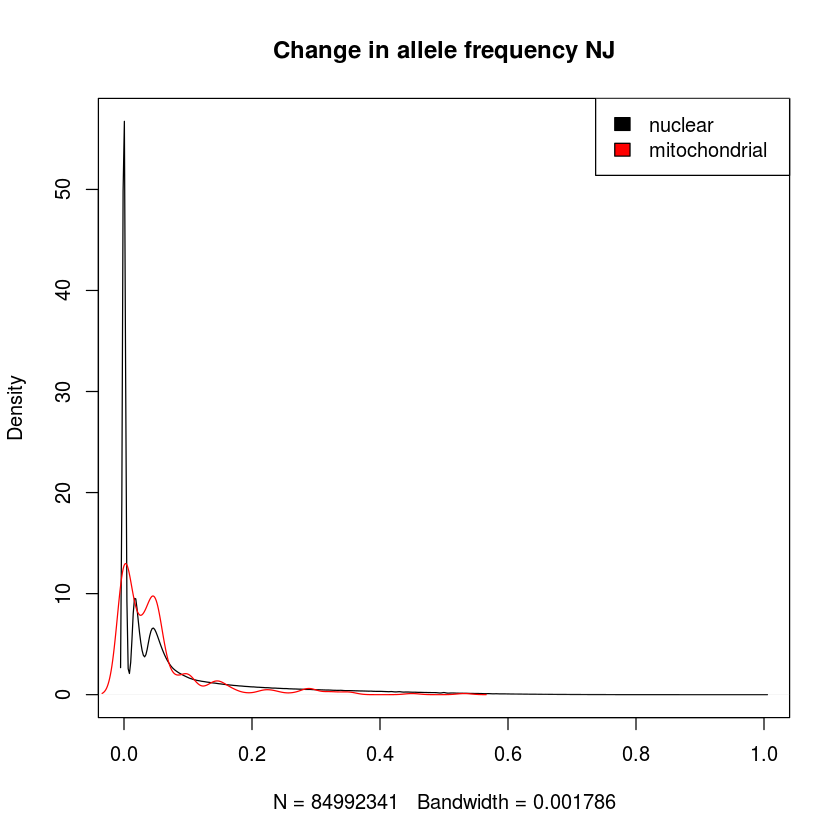

In [20]:
plot(density(njeunuc$diff), main="Change in allele frequency NJ", xlim=c(0,1))
     lines(density(AAPE02072785nj$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

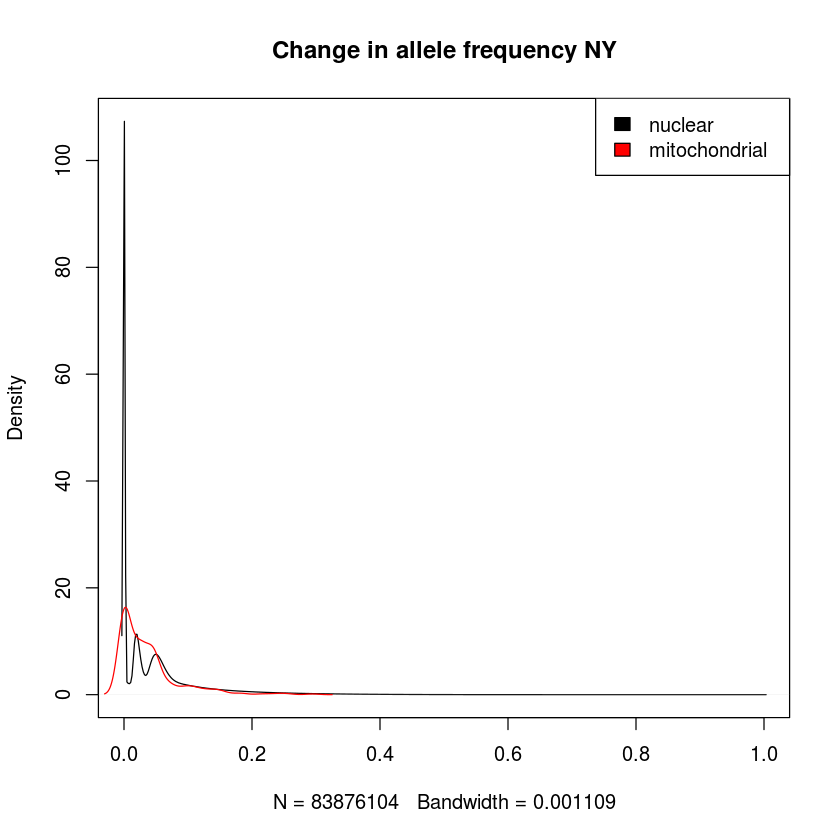

In [21]:
plot(density(nyeusnps$diff), main="Change in allele frequency NY", xlim=c(0,1))
     lines(density(AAPE02072785ny$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

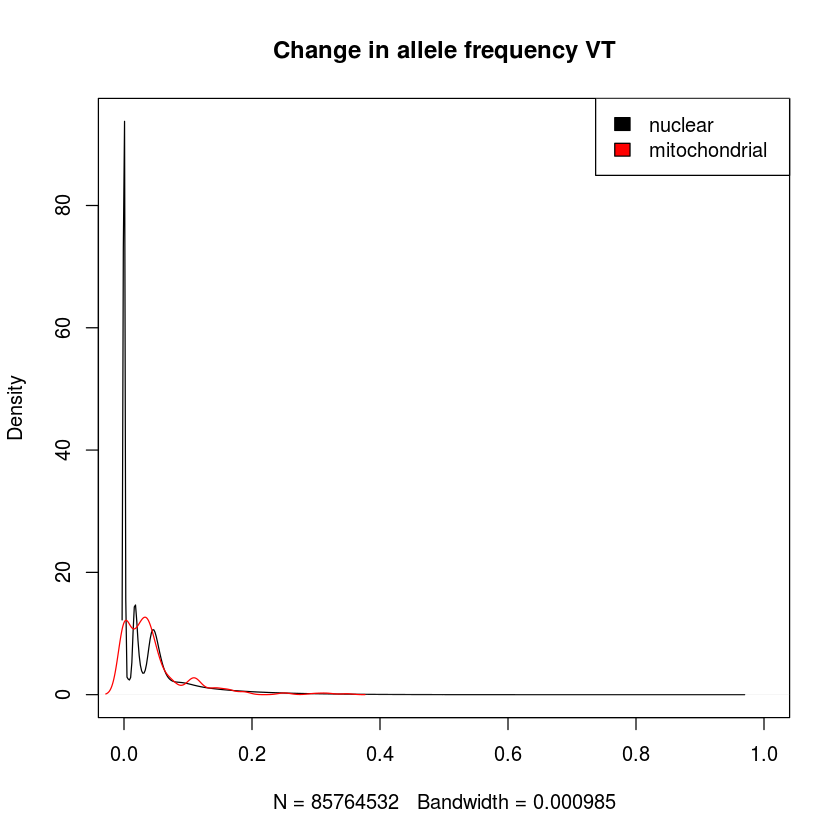

In [22]:
plot(density(vteusnps$diff), main="Change in allele frequency VT", xlim=c(0,1))
     lines(density(AAPE02072785vt$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

See All_allele_freq_change for wright-fisher simulations for comparison of nuclear and mitochondrial regions under drift

Use probabilistic nature of genotypes as input for more wright-fisher simulations

In [ ]:
plot(njeusnps$nInd_E, njeusnps$diff)
#lines(density(AAPE02072785ny$diff), col="red") 

In [26]:
mitonjvt=merge(AAPE02072785nj, AAPE02072785vt, by="Position")

In [27]:
NROW(mitonjvt)

[1] 315

In [31]:
mitonyvt=merge(AAPE02072785ny, AAPE02072785vt, by="Position")
NROW(mitonyvt)

[1] 317

In [32]:
mitonynj=merge(AAPE02072785ny, AAPE02072785nj, by="Position")
NROW(mitonynj)

[1] 234

In [33]:
mitonjvtny=merge(AAPE02072785ny, mitonjvt, by="Position")

In [34]:
NROW(mitonjvtny)

[1] 234

In [4]:
njeutop=njeu[order(-njeu$diff),] 

ERROR: Error in eval(expr, envir, enclos): object 'njeu' not found


In [5]:
njeu50=njeusnps[diff>=0.5,]

In [8]:
colnames(njeu50)

[1] "V1"           "Scaffold"     "Position"     "Major"        "Minor"       
 [6] "KnownMaf_E"   "UnknownMaf_E" "nInd_E"       "KnownMaf_U"   "UnknownMaf_U"
[11] "nInd_U"       "absdiff"

In [6]:
colnames(njeu50)[12]="absdiff"

In [34]:
njeu50$diff=njeu50$UnknownMaf_E-njeu50$UnknownMaf_U

In [7]:
NROW(njeu50)

[1] 1417469

In [38]:
nyeutop=nyeu[order(-nyeu$diff),] 

In [17]:
nyeu50=nyeusnps[diff>=0.5,]

In [9]:
colnames(nyeu50)[12]="absdiff"

In [10]:
nyeu50$diff=nyeu50$UnknownMaf_E-nyeu50$UnknownMaf_U

In [11]:
NROW(nyeu50)

[1] 94231

In [41]:
vteutop=vteu[order(-vteu$diff),] 

In [12]:
vteu50=vteusnps[diff>=0.5,]

In [13]:
colnames(vteu50)[12]="absdiff"

In [33]:
vteu50$diff=vteu50$UnknownMaf_E-vteu50$UnknownMaf_U

In [15]:
NROW(vteu50)

[1] 45013

In [ ]:
njeutop2=njeutop[1:2188485,]

In [35]:
njny50=merge(njeu50, nyeu50, by=c("Scaffold", "Position"))

In [36]:
colnames(njny50)

[1] "Scaffold"       "Position"       "V1.x"           "Major.x"       
 [5] "Minor.x"        "KnownMaf_E.x"   "UnknownMaf_E.x" "nInd_E.x"      
 [9] "KnownMaf_U.x"   "UnknownMaf_U.x" "nInd_U.x"       "absdiff.x"     
[13] "diff.x"         "V1.y"           "Major.y"        "Minor.y"       
[17] "KnownMaf_E.y"   "UnknownMaf_E.y" "nInd_E.y"       "KnownMaf_U.y"  
[21] "UnknownMaf_U.y" "nInd_U.y"       "absdiff.y"      "diff.y"

In [37]:
njnyvt50=merge(njny50, vteu50, by=c("Scaffold", "Position"))

In [28]:
NROW(njnyvt50)

[1] 56

In [38]:
head(njnyvt50)

Scaffold,Position,V1.x,Major.x,Minor.x,KnownMaf_E.x,UnknownMaf_E.x,nInd_E.x,KnownMaf_U.x,UnknownMaf_U.x,⋯,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,absdiff,diff
GL429767,4380147,197148,C,A,0.639555,0.639555,15,0.135642,0.135641,⋯,C,A,0.549148,0.159976,11,0.678510,0.678509,13,0.518533,-0.518533
GL429775,9101293,11199573,A,T,1.000004,0.999996,6,0.445669,0.445670,⋯,A,T,0.191705,0.191710,16,0.707841,0.707842,12,0.516132,-0.516132
GL429778,10560380,13910230,A,G,0.681164,0.681166,15,0.178912,0.178911,⋯,A,G,0.819268,0.819271,9,0.274205,0.274211,15,0.545060,0.545060
GL429779,15275365,15186049,T,C,0.257400,0.257400,11,0.801857,0.801853,⋯,T,C,0.789305,0.789302,12,0.284627,0.284626,13,0.504676,0.504676
GL429793,3619488,23553109,T,G,0.528160,0.528162,15,0.063697,0.022021,⋯,T,G,0.829730,0.829730,12,0.259294,0.259297,15,0.570433,0.570433
GL429799,2747281,24315091,G,A,0.546562,0.546558,18,0.000000,0.000003,⋯,G,A,0.257564,0.091236,15,0.627030,0.627028,11,0.535792,-0.535792


In [39]:
njnyvt50$KnownMaf_E.x=NULL
njnyvt50$KnownMaf_U.x=NULL
njnyvt50$KnownMaf_E.y=NULL
njnyvt50$KnownMaf_U.y=NULL
njnyvt50$KnownMaf_E=NULL
njnyvt50$KnownMaf_U=NULL

In [41]:
colnames(njnyvt50)=c("Scaffold", "Position", "V1_NJ", "Major_NJ", "Minor_NJ", "Maf_NJE", "nInd_NJE", "Maf_NJU", "nInd_NJU","absdiff_NJ", "diff_NJ",
                    "V1_NY", "Major_NY", "Minor_NY", "Maf_NYE", "nInd_NYE", "Maf_NYU", "nInd_NYU", "absdiff_NY","diff_NY",
                    "V1_VT", "Major_VT", "Minor_VT", "Maf_VTE", "nInd_VTE", "Maf_VTU", "nInd_VTU","absdiff_VT", "diff_VT")

Only taking otus that have the same direction of allele frequency change

In [42]:
njnyvt50pos=njnyvt50[njnyvt50$diff_NJ>0 & njnyvt50$diff_NY>0 & njnyvt50$diff_VT>0,]

In [43]:
NROW(njnyvt50pos)

[1] 10

In [44]:
njnyvt50neg=njnyvt50[njnyvt50$diff_NJ<0 & njnyvt50$diff_NY<0 & njnyvt50$diff_VT<0,]

In [45]:
NROW(njnyvt50neg)

[1] 0

In [46]:
write.csv(njnyvt50pos, "Candidate_SNPs_NJNYVT.csv")

Plot distribution of allele freq change for all snps, then add our 10 snps in

In [4]:
njnyvt50pos=read.csv("Candidate_SNPs_NJNYVT.csv")

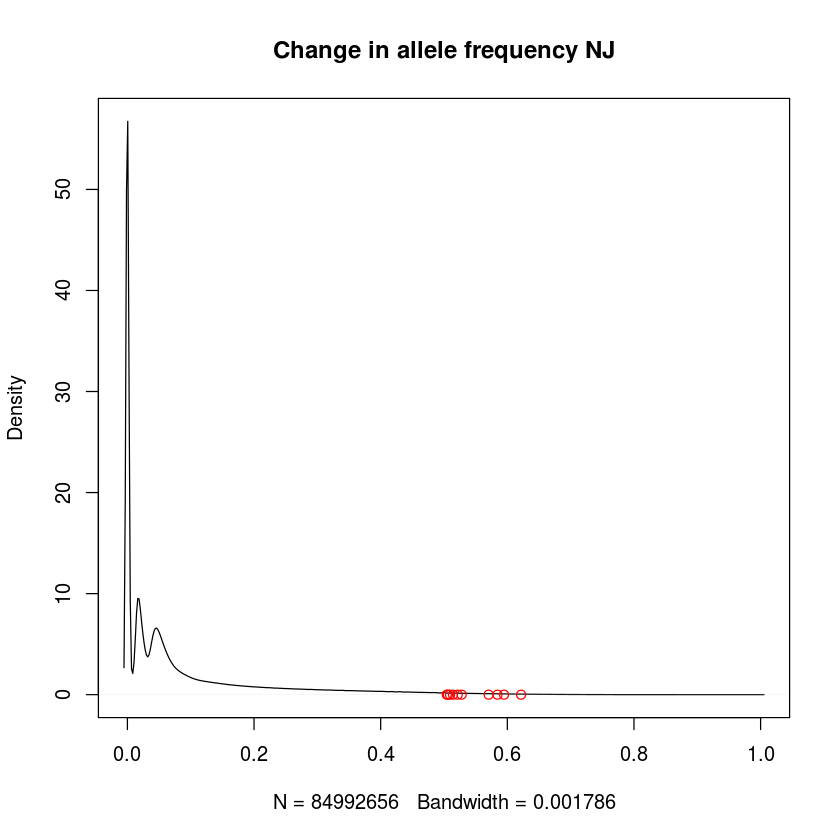

In [31]:
plot(density(njeusnps$diff), main="Change in allele frequency NJ")
points(njnyvt50pos$diff_NJ, y=c(0,0,0,0,0,0,0,0,0,0), col="red")

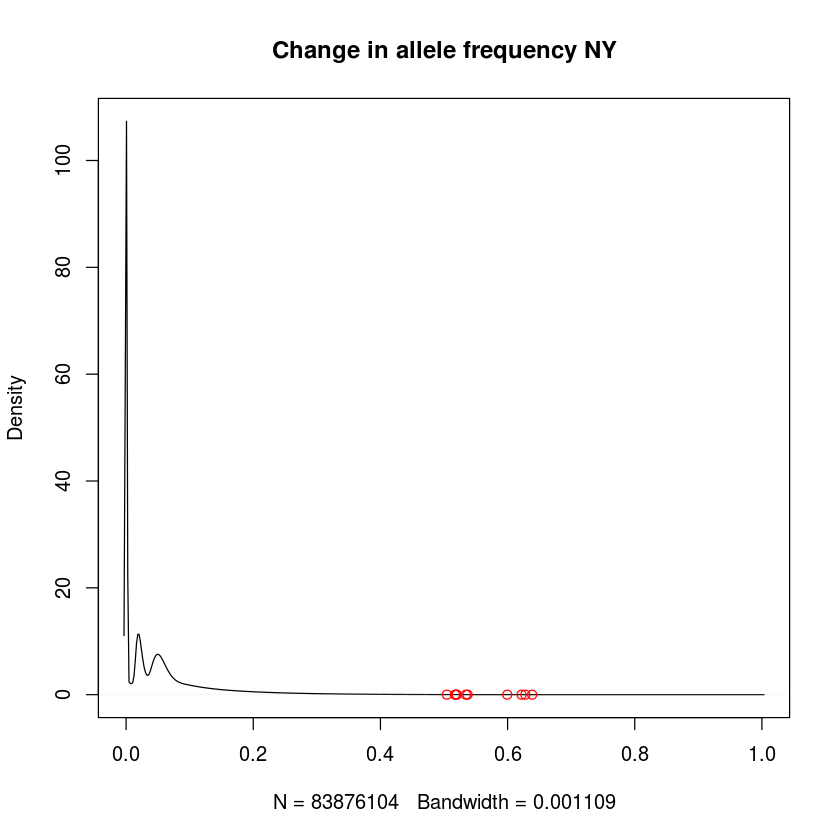

In [32]:
plot(density(nyeusnps$diff), main="Change in allele frequency NY")
points(njnyvt50pos$diff_NY, y=c(0,0,0,0,0,0,0,0,0,0), col="red")

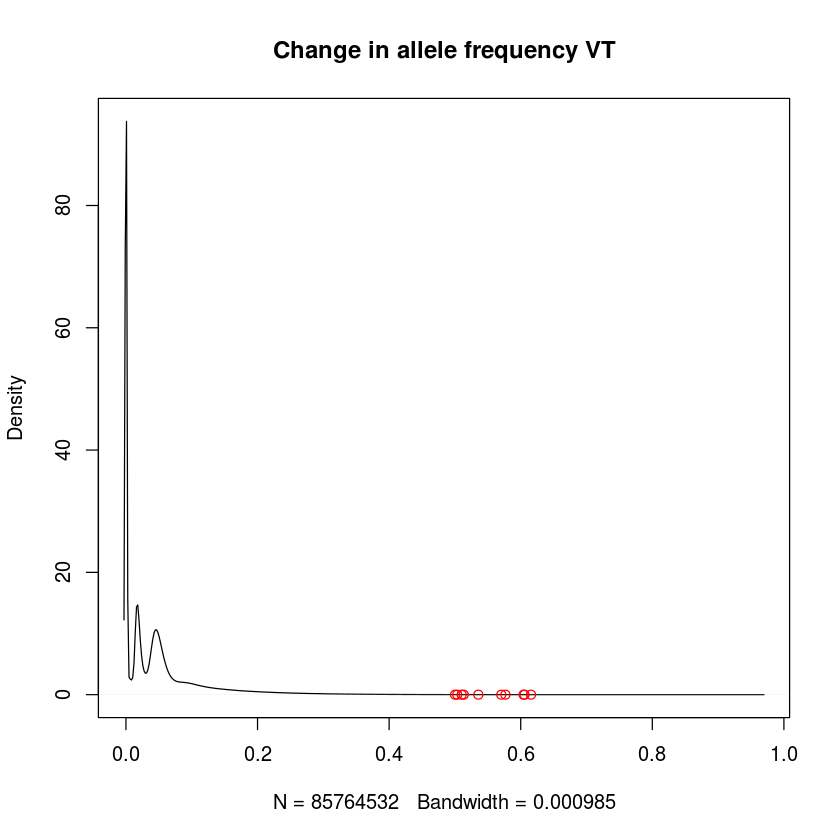

In [33]:
plot(density(vteusnps$diff), main="Change in allele frequency VT")
points(njnyvt50pos$diff_VT, y=c(0,0,0,0,0,0,0,0,0,0), col="red")

Tajiimas D, heterozygosity, allele freq change in the immediate region of these SNPs. 

In [49]:
njnyvt50pos

X,Scaffold,Position,V1_NJ,Major_NJ,Minor_NJ,Maf_NJE,nInd_NJE,Maf_NJU,nInd_NJU,⋯,diff_NY,V1_VT,Major_VT,Minor_VT,Maf_VTE,nInd_VTE,Maf_VTU,nInd_VTU,absdiff_VT,diff_VT
1,GL429793,3619488,23553109,T,G,0.528162,15,0.022021,13,⋯,0.519980,24024982,T,G,0.829730,12,0.259297,15,0.570433,0.570433
2,GL429805,5255331,27651836,T,C,0.504441,13,0.000002,12,⋯,0.627868,28143270,T,C,0.680912,12,0.065294,14,0.615618,0.615618
3,GL429830,4776068,37532366,A,G,0.570499,14,0.000001,9,⋯,0.599434,38076385,A,G,0.704484,12,0.100085,9,0.604399,0.604399
4,GL429833,4827830,38514504,A,G,0.527892,14,0.000004,11,⋯,0.622024,39063519,A,G,0.648989,15,0.113387,14,0.535602,0.535602
5,GL429835,4132453,39057412,G,A,0.594808,14,0.000002,11,⋯,0.504513,39609333,G,A,0.689984,11,0.186496,12,0.503488,0.503488
6,GL429848,4054536,42122468,T,A,0.584434,16,0.000002,7,⋯,0.638618,42682553,T,A,0.540499,14,0.040327,12,0.500172,0.500172
7,GL429859,3284246,45512039,C,T,0.521609,12,0.000005,12,⋯,0.534436,46090713,C,T,0.700524,13,0.187096,13,0.513428,0.513428
8,GL429941,1539533,59279424,G,A,0.509509,14,0.000002,13,⋯,0.537091,59920934,G,A,0.709405,15,0.199098,15,0.510307,0.510307
9,GL430044,240397,70273733,C,G,0.621718,13,0.000004,14,⋯,0.519343,70962476,C,G,0.626596,15,0.049824,15,0.576772,0.576772
10,GL430199,598814,77485214,G,A,0.514167,16,0.000004,13,⋯,0.517220,78211573,G,A,0.654467,17,0.048683,14,0.605784,0.605784


In [5]:
njloc=which( outer(njeusnps$Scaffold, njnyvt50pos$Scaffold, "==") & 
       outer(njeusnps$Position, njnyvt50pos$Position, "=="), 
       arr.ind=TRUE)
njloc=as.vector(njloc[,1])

In [6]:
nyloc=which( outer(nyeusnps$Scaffold, njnyvt50pos$Scaffold, "==") & 
       outer(nyeusnps$Position, njnyvt50pos$Position, "=="), 
       arr.ind=TRUE)
nyloc=as.vector(nyloc[,1])

In [7]:
vtloc=which( outer(vteusnps$Scaffold, njnyvt50pos$Scaffold, "==") & 
       outer(vteusnps$Position, njnyvt50pos$Position, "=="), 
       arr.ind=TRUE)
vtloc=as.vector(vtloc[,1])

In [68]:
njloc[1]-10

[1] 23553099

In [23]:
SNP3619488nj=njeusnps[(njloc[1]-1000):(njloc[1]+1000),]
SNP5255331nj=njeusnps[(njloc[2]-1000):(njloc[2]+1000),]
SNP4776068nj=njeusnps[(njloc[3]-1000):(njloc[3]+1000),]
SNP4827830nj=njeusnps[(njloc[4]-1000):(njloc[4]+1000),]
SNP4132453nj=njeusnps[(njloc[5]-1000):(njloc[5]+1000),]
SNP4054536nj=njeusnps[(njloc[6]-1000):(njloc[6]+1000),]
SNP3284246nj=njeusnps[(njloc[7]-1000):(njloc[7]+1000),]
SNP1539533nj=njeusnps[(njloc[8]-1000):(njloc[8]+1000),]
SNP240397nj=njeusnps[(njloc[9]-1000):(njloc[9]+1000),]
SNP598814nj=njeusnps[(njloc[10]-1000):(njloc[10]+1000),]

In [24]:
SNP3619488ny=nyeusnps[(nyloc[1]-1000):(nyloc[1]+1000),]
SNP5255331ny=nyeusnps[(nyloc[2]-1000):(nyloc[2]+1000),]
SNP4776068ny=nyeusnps[(nyloc[3]-1000):(nyloc[3]+1000),]
SNP4827830ny=nyeusnps[(nyloc[4]-1000):(nyloc[4]+1000),]
SNP4132453ny=nyeusnps[(nyloc[5]-1000):(nyloc[5]+1000),]
SNP4054536ny=nyeusnps[(nyloc[6]-1000):(nyloc[6]+1000),]
SNP3284246ny=nyeusnps[(nyloc[7]-1000):(nyloc[7]+1000),]
SNP1539533ny=nyeusnps[(nyloc[8]-1000):(nyloc[8]+1000),]
SNP240397ny=nyeusnps[(nyloc[9]-1000):(nyloc[9]+1000),]
SNP598814ny=nyeusnps[(nyloc[10]-1000):(nyloc[10]+1000),]

In [25]:
SNP3619488vt=vteusnps[(vtloc[1]-1000):(vtloc[1]+1000),]
SNP5255331vt=vteusnps[(vtloc[2]-1000):(vtloc[2]+1000),]
SNP4776068vt=vteusnps[(vtloc[3]-1000):(vtloc[3]+1000),]
SNP4827830vt=vteusnps[(vtloc[4]-1000):(vtloc[4]+1000),]
SNP4132453vt=vteusnps[(vtloc[5]-1000):(vtloc[5]+1000),]
SNP4054536vt=vteusnps[(vtloc[6]-1000):(vtloc[6]+1000),]
SNP3284246vt=vteusnps[(vtloc[7]-1000):(vtloc[7]+1000),]
SNP1539533vt=vteusnps[(vtloc[8]-1000):(vtloc[8]+1000),]
SNP240397vt=vteusnps[(vtloc[9]-1000):(vtloc[9]+1000),]
SNP598814vt=vteusnps[(vtloc[10]-1000):(vtloc[10]+1000),]

In [26]:
write.csv(SNP3619488nj, file="SNP3619488nj.csv")
write.csv(SNP5255331nj, file="SNP5255331nj.csv")
write.csv(SNP4776068nj, file="SNP4776068nj.csv")
write.csv(SNP4827830nj, file="SNP4827830nj.csv")
write.csv(SNP4132453nj, file="SNP4132453.csv")
write.csv(SNP4054536nj, file="SNP4054536nj.csv")
write.csv(SNP3284246nj, file="SNP3284246nj.csv")
write.csv(SNP1539533nj, file="SNP1539533nj.csv")
write.csv(SNP240397nj, file="SNP240397nj.csv")
write.csv(SNP598814nj, file="SNP598814nj.csv")

In [27]:
write.csv(SNP3619488ny, file="SNP3619488ny.csv")
write.csv(SNP5255331ny, file="SNP5255331ny.csv")
write.csv(SNP4776068ny, file="SNP4776068ny.csv")
write.csv(SNP4827830ny, file="SNP4827830ny.csv")
write.csv(SNP4132453ny, file="SNP4132453ny.csv")
write.csv(SNP4054536ny, file="SNP4054536ny.csv")
write.csv(SNP3284246ny, file="SNP3284246ny.csv")
write.csv(SNP1539533ny, file="SNP1539533ny.csv")
write.csv(SNP240397ny, file="SNP240397ny.csv")
write.csv(SNP598814ny, file="SNP598814ny.csv")

In [28]:
write.csv(SNP3619488vt, file="SNP3619488vt.csv")
write.csv(SNP5255331vt, file="SNP5255331vt.csv")
write.csv(SNP4776068vt, file="SNP4776068vt.csv")
write.csv(SNP4827830vt, file="SNP4827830vt.csv")
write.csv(SNP4132453vt, file="SNP4132453vt.csv")
write.csv(SNP4054536vt, file="SNP4054536vt.csv")
write.csv(SNP3284246vt, file="SNP3284246vt.csv")
write.csv(SNP1539533vt, file="SNP1539533vt.csv")
write.csv(SNP240397vt, file="SNP240397vt.csv")
write.csv(SNP598814vt, file="SNP598814vt.csv")

Make plots for all the other snps like the ones below. Then, take a random sample from a certain distance away and make a plot. see if it looks different. A few million bp away?

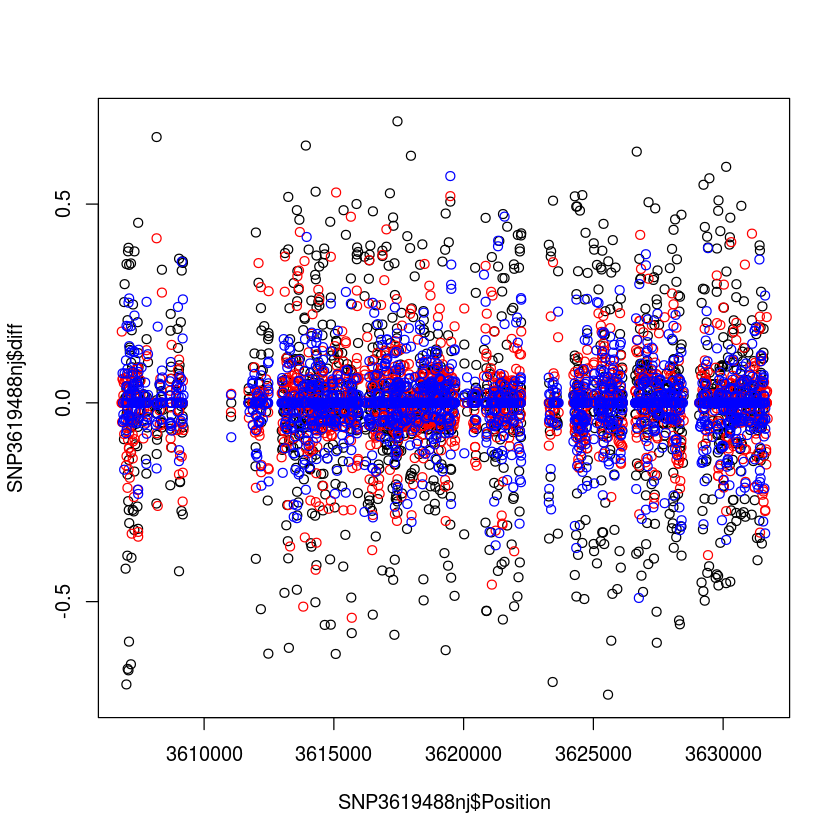

In [29]:
plot(SNP3619488nj$Position, SNP3619488nj$diff)
points(SNP3619488ny$Position, SNP3619488ny$diff, col="red")
points(SNP3619488vt$Position, SNP3619488vt$diff, col="blue")

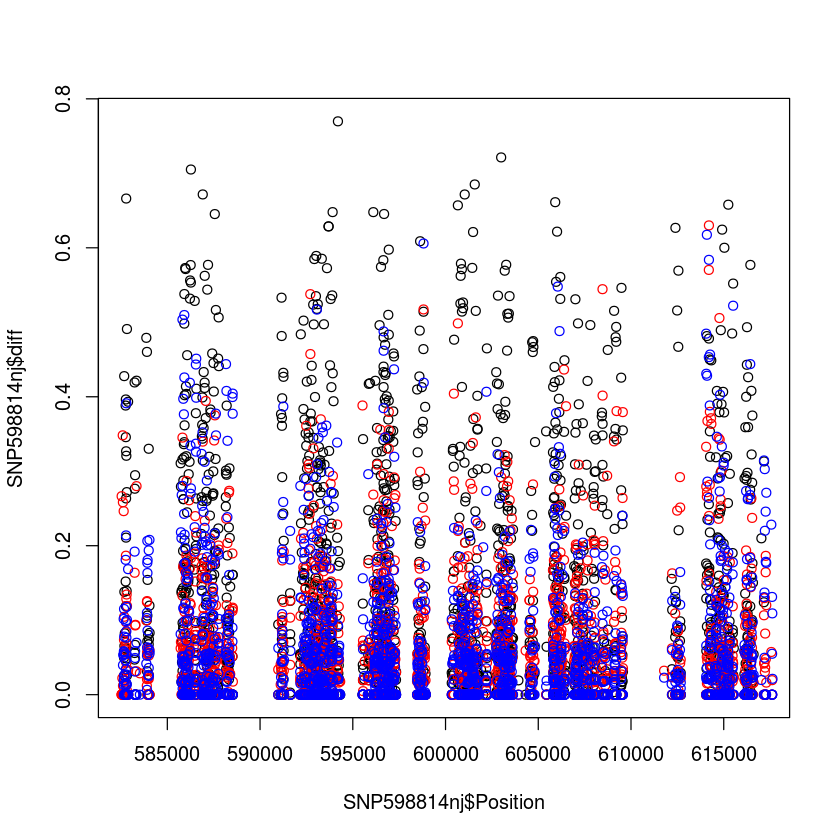

In [30]:
plot(SNP598814nj$Position, SNP598814nj$diff)
points(SNP598814ny$Position, SNP598814ny$diff, col="red")
points(SNP598814vt$Position, SNP598814vt$diff, col="blue")

Graph the difference for each snp surrounding our targets for each population
allele freq change vs distance from snp, go out a few thousand to see if there is a slow decline in allele freq. 
